![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Cài đặt thư viện cần thiết

In [1]:
%pip install pandas matplotlib seaborn plotly
%pip install chart_studio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import ast

sns.set()

In [3]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('Data/Final_Harry93.csv')
print(df.head())

                                             post_id  \
0  pfbid037nJvE8Y3buLNNRezqZS6L6mHoByD8NxdLUwXAp8...   
1  pfbid02YkYeWAcdyv2XkfBP3ZYjEtLo2DpuEu2WxbG1B89...   
2  pfbid023a7jkBr9CWXmTwX27jkU4q7avRWicnMbfdnuZey...   
3  pfbid02TUYFtHr8h17Qipuh5AvBwDF3mB18u1zAx1vUr7Q...   
4  pfbid02yZptV8GSxyJ6W3iRXs81QfxMpQVyYjPiAzmi38F...   

                                                text                 time  \
0  Thanks to our away fans for the unbelievable s...  2023-11-22 02:14:00   
1  The time to tackle online abuse in football is...  2023-11-14 19:07:00   
2                       A big 3 points in London 💪❤️  2023-11-05 02:14:00   
3  A win dedicated to Sir Bobby Charlton. A legen...  2023-10-22 04:49:00   
4  Special night at Wembley - Qualification secur...  2023-10-18 14:24:00   

   comments  shares                                          reactions  \
0       473      24  {'like': 13176, 'love': 2421, 'care': 201, 'ha...   
1        92       5  {'like': 1017, 'love': 170, 'ha

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Bài viết có nhiều lượt tương tác nhất

In [4]:
df['total_interactions'] = df['comments'] + df['shares'] + df['reaction_count']
top_post = df.loc[df['total_interactions'].idxmax(), ['text', 'time', 'reaction_count', 'comments', 'shares', 'total_interactions' ]]
print(top_post)

text                  A shirt to be proud of. Let’s go Manchester Un...
time                                                2022-07-08 23:03:00
reaction_count                                                   349276
comments                                                          32880
shares                                                             4453
total_interactions                                               386609
Name: 74, dtype: object


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Đếm tổng số lượt bình luận, chia sẻ và reactions

In [5]:
comment_count = df['comments'].sum()
share_count = df['shares'].sum()
reaction_count = df['reaction_count'].sum()

print("Total comments:", comment_count)
print("Total shares:", share_count)
print("Total reactions:", reaction_count)

Total comments: 658146
Total shares: 70610
Total reactions: 11030638


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Vẽ biểu đồ phân phối tổng số tương tác

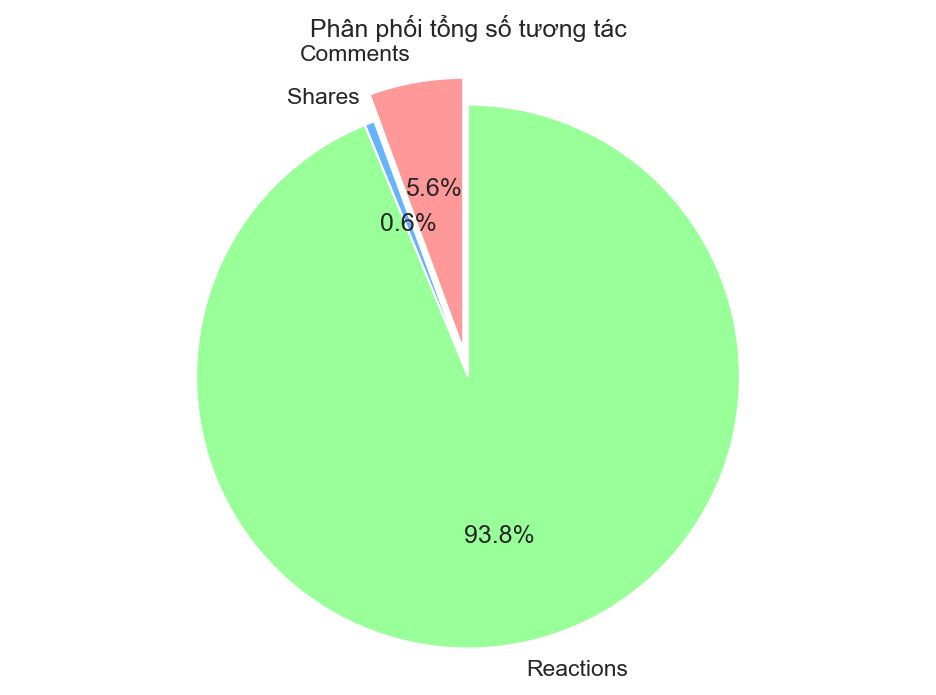

In [6]:
# Tạo danh sách giá trị và nhãn cho biểu đồ
values = [comment_count, share_count, reaction_count]
labels = ['Comments', 'Shares', 'Reactions']
colors = ['#ff9999', '#66b3ff', '#99ff99'] 
explode = [0.1, 0, 0] 

plt.figure(dpi=150)
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=90)
plt.title('Phân phối tổng số tương tác')

plt.axis('equal')
plt.tight_layout()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Quan hệ giữa số lượt bình luận và chia sẻ

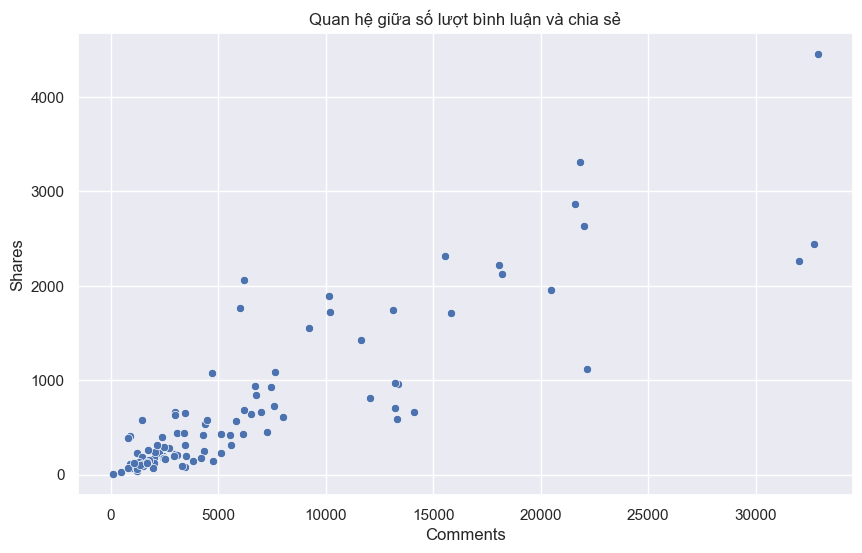

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='comments', y='shares')
plt.xlabel('Comments')
plt.ylabel('Shares')
plt.title('Quan hệ giữa số lượt bình luận và chia sẻ')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Tương quan giữa tổng số tương tác, số lượng bình luận và độ dài bài viết

c:\Users\pcduc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


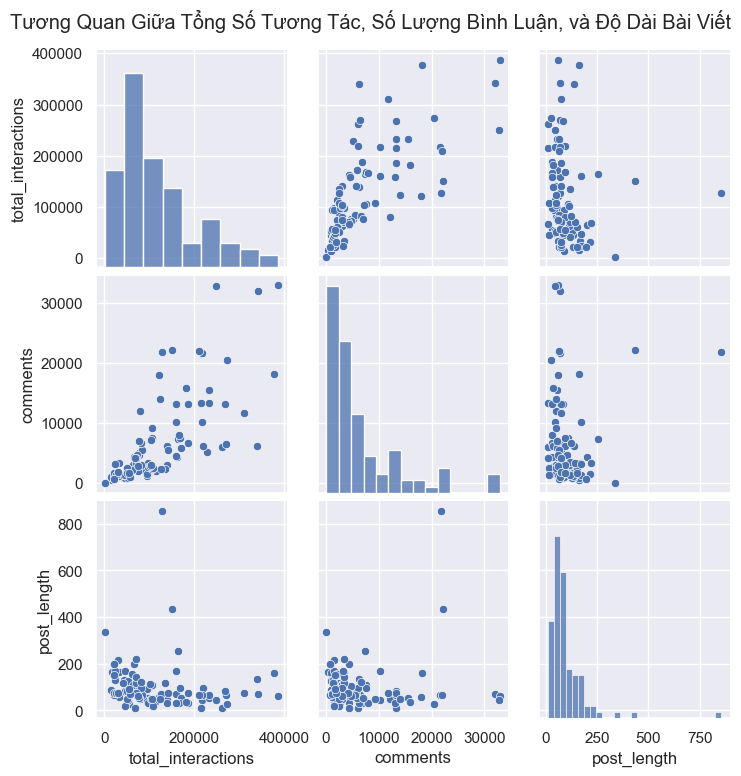

In [8]:
df['post_length'] = df['text'].apply(len)

# Creating pairplot
sns.pairplot(df[['total_interactions', 'comments', 'post_length']])
plt.suptitle('Tương Quan Giữa Tổng Số Tương Tác, Số Lượng Bình Luận, và Độ Dài Bài Viết', y=1.03)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Biểu cảm của các bài đăng

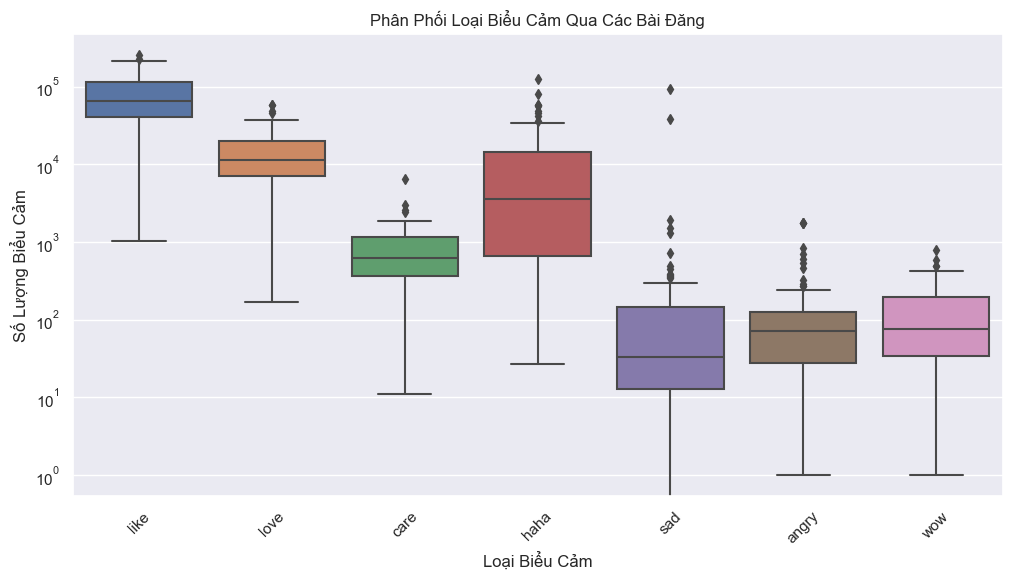

In [9]:
# Chuyển đổi cột 'reactions' từ chuỗi JSON sang dictionary
df['reactions'] = df['reactions'].apply(ast.literal_eval)

# Tính toán các loại phản ứng riêng lẻ
df['like'] = df['reactions'].apply(lambda x: x.get('like', 0))
df['love'] = df['reactions'].apply(lambda x: x.get('love', 0))
df['care'] = df['reactions'].apply(lambda x: x.get('care', 0))
df['haha'] = df['reactions'].apply(lambda x: x.get('haha', 0))
df['sad'] = df['reactions'].apply(lambda x: x.get('sad', 0))
df['angry'] = df['reactions'].apply(lambda x: x.get('angry', 0))
df['wow'] = df['reactions'].apply(lambda x: x.get('wow', 0))

# Tạo biểu đồ phân phối loại phản ứng qua các bài đăng
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['like', 'love', 'care', 'haha', 'sad', 'angry', 'wow']])
plt.title('Phân Phối Loại Biểu Cảm Qua Các Bài Đăng')
plt.ylabel('Số Lượng Biểu Cảm')
plt.xlabel('Loại Biểu Cảm')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Biểu Đồ Nhiệt Tương Quan Giữa Các Loại Biểu Cảm

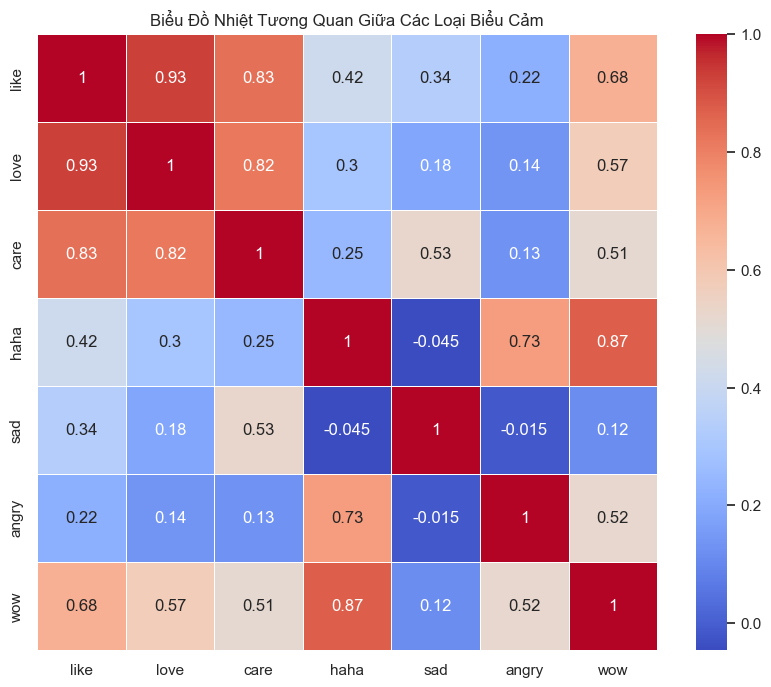

In [10]:
correlation_matrix = df[['like', 'love', 'care', 'haha', 'sad', 'angry', 'wow']].corr()

# Tạo bản đồ nhiệt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Biểu Đồ Nhiệt Tương Quan Giữa Các Loại Biểu Cảm')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Số lượng bài đăng theo giờ trong ngày

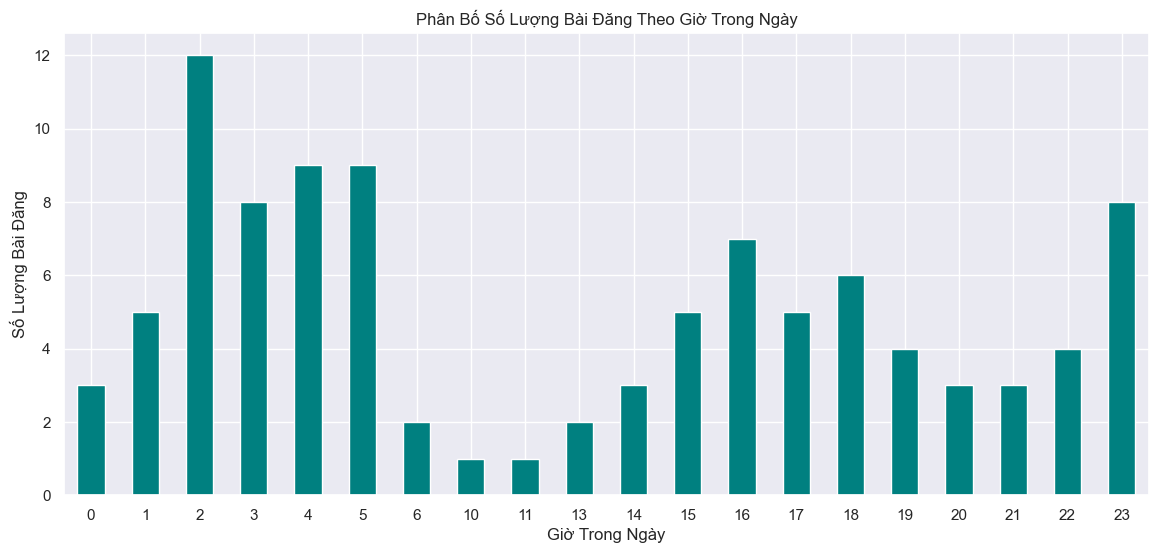

In [11]:
df['time'] = pd.to_datetime(df['time'])

# Extract hour from the datetime
df['hour'] = df['time'].dt.hour

# Count the number of posts per hour
hourly_posts = df['hour'].value_counts().sort_index()

# Creating a bar chart for post frequency per hour
plt.figure(figsize=(14, 6))
hourly_posts.plot(kind='bar', color='teal')
plt.xlabel('Giờ Trong Ngày')
plt.ylabel('Số Lượng Bài Đăng')
plt.title('Phân Bố Số Lượng Bài Đăng Theo Giờ Trong Ngày')
plt.xticks(rotation=0)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Biểu đồ phân tích chuỗi thời gian của comments, shares và reactions

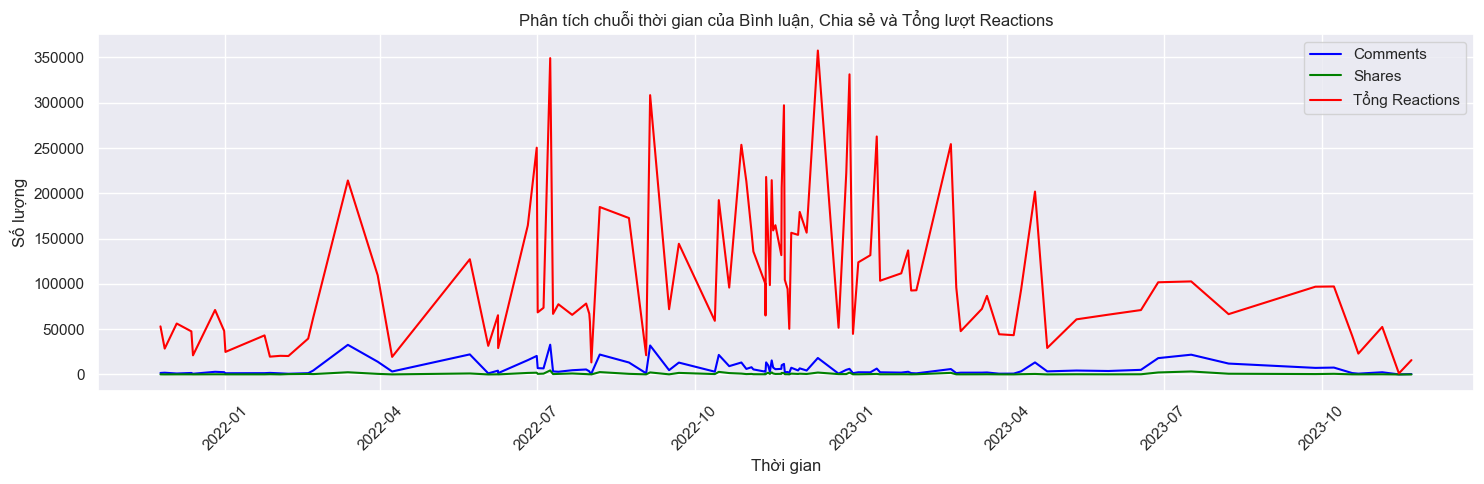

In [12]:
plt.figure(figsize=(15, 5))

plt.plot(df['time'], df['comments'], label='Comments', color='blue')
plt.plot(df['time'], df['shares'], label='Shares', color='green')
plt.plot(df['time'], df['reaction_count'], label='Tổng Reactions', color='red')

plt.title('Phân tích chuỗi thời gian của Bình luận, Chia sẻ và Tổng lượt Reactions')
plt.xlabel('Thời gian')
plt.ylabel('Số lượng')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Biểu đồ phân phối của comments, shares và tổng lượt reaction

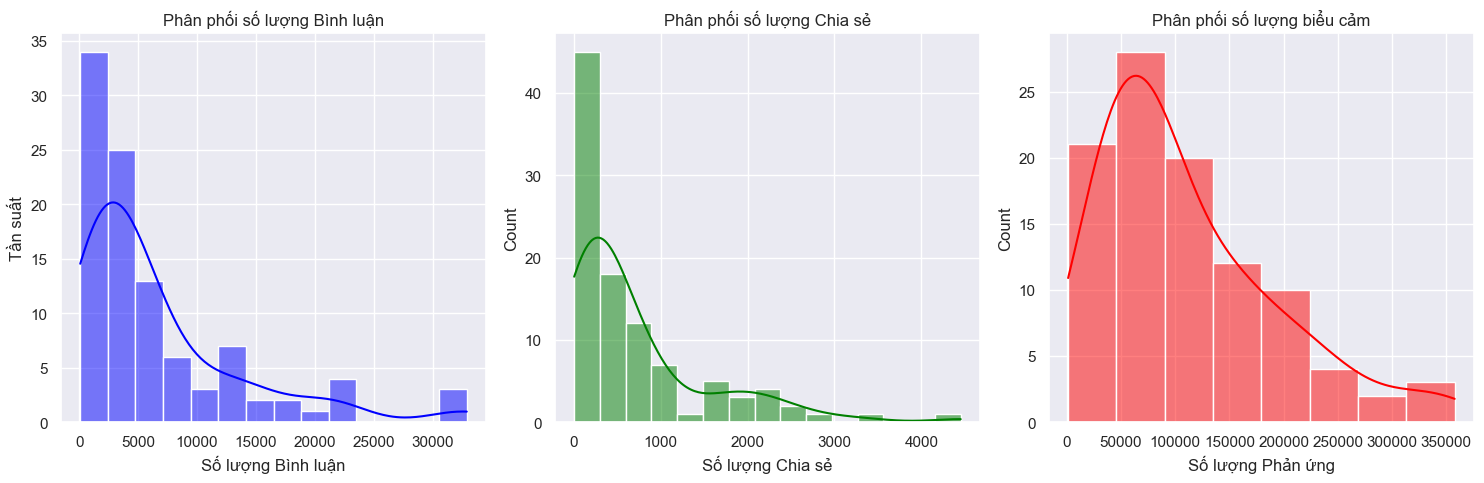

In [13]:
plt.figure(figsize=(15, 5))

# Biểu đồ phân phối cho comments
plt.subplot(1, 3, 1)
sns.histplot(df['comments'], kde=True, color='blue')
plt.title('Phân phối số lượng Bình luận')
plt.xlabel('Số lượng Bình luận')
plt.ylabel('Tần suất')

# Biểu đồ phân phối cho shares
plt.subplot(1, 3, 2)
sns.histplot(df['shares'], kde=True, color='green')
plt.title('Phân phối số lượng Chia sẻ')
plt.xlabel('Số lượng Chia sẻ')

# Biểu đồ phân phối cho reaction counts
plt.subplot(1, 3, 3)
sns.histplot(df['reaction_count'], kde=True, color='red')
plt.title('Phân phối số lượng biểu cảm')
plt.xlabel('Số lượng Phản ứng')

plt.tight_layout()  # Điều chỉnh layout để không bị cắt các nhãn

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Số lượng bài đăng theo tháng

In [14]:
df['time'] = pd.to_datetime(df['time'])

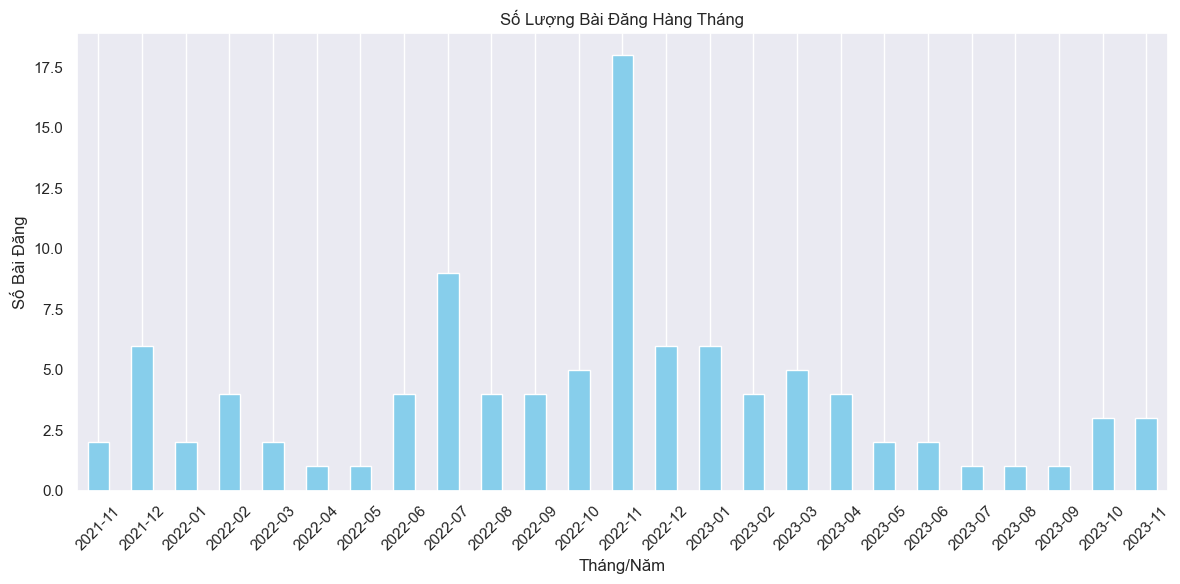

In [15]:
df['month_year'] = df['time'].dt.to_period('M')
monthly_posts = df.groupby('month_year').size()

plt.figure(figsize=(12, 6))
monthly_posts.plot(kind='bar', color='skyblue')
plt.title('Số Lượng Bài Đăng Hàng Tháng')
plt.xlabel('Tháng/Năm')
plt.ylabel('Số Bài Đăng')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
df['month_year'] = df['time'].dt.strftime('%Y-%m')
monthly_posts = df.groupby('month_year').size().reset_index(name='post_count')
fig = px.line(monthly_posts, x='month_year', y='post_count', title='Xu Hướng Số Lượng Bài Đăng Hàng Tháng')
fig.update_xaxes(title_text='Tháng/Năm')
fig.update_yaxes(title_text='Số Bài Đăng')
fig.update_layout(
    title={
        'text': 'Xu Hướng Số Lượng Bài Đăng Hàng Tháng',
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5,
        'y': 0.95
    }
)
fig.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Số lượng reactions theo tháng

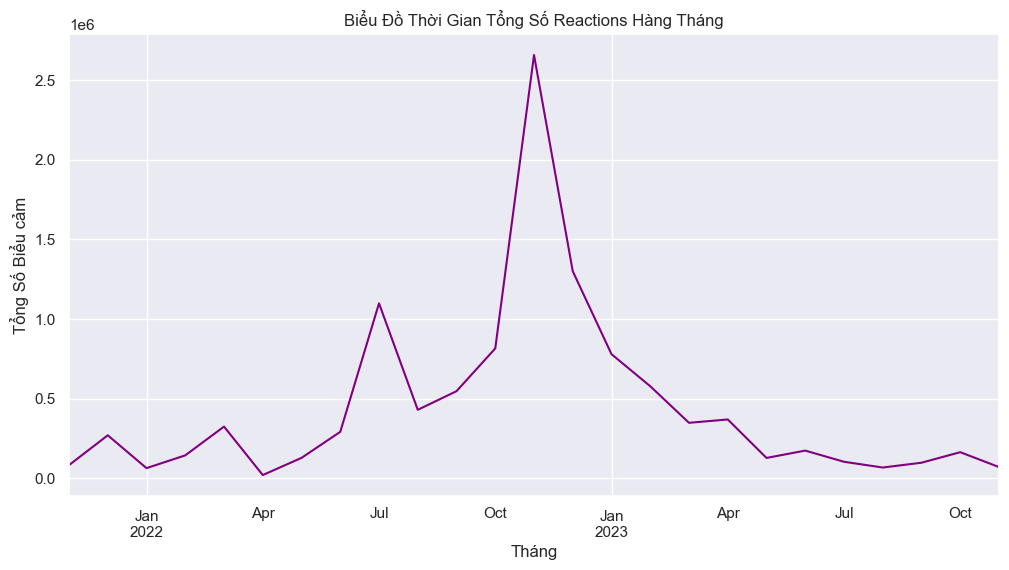

In [17]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

df['total_reactions'] = df['like'] + df['love'] + df['care'] + df['haha'] + df['sad'] + df['angry'] + df['wow']

plt.figure(figsize=(12, 6))
df['total_reactions'].resample('M').sum().plot(kind='line', color='purple')
plt.title('Biểu Đồ Thời Gian Tổng Số Reactions Hàng Tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng Số Biểu cảm')
plt.show()


## NHẬN XÉT: Dựa vào 3 biểu đồ phía trên, chúng ta thấy rằng: Khoảng thời gian cuối năm 2022 các bài đăng và lượt tương tác của Page tăng đột biến. Điều này được giải thích bởi vào thời gian đó VCK World Cup môn bóng đá nam được diễn ra tại Quatar. 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Tần suất các từ xuất hiện trong bài đăng

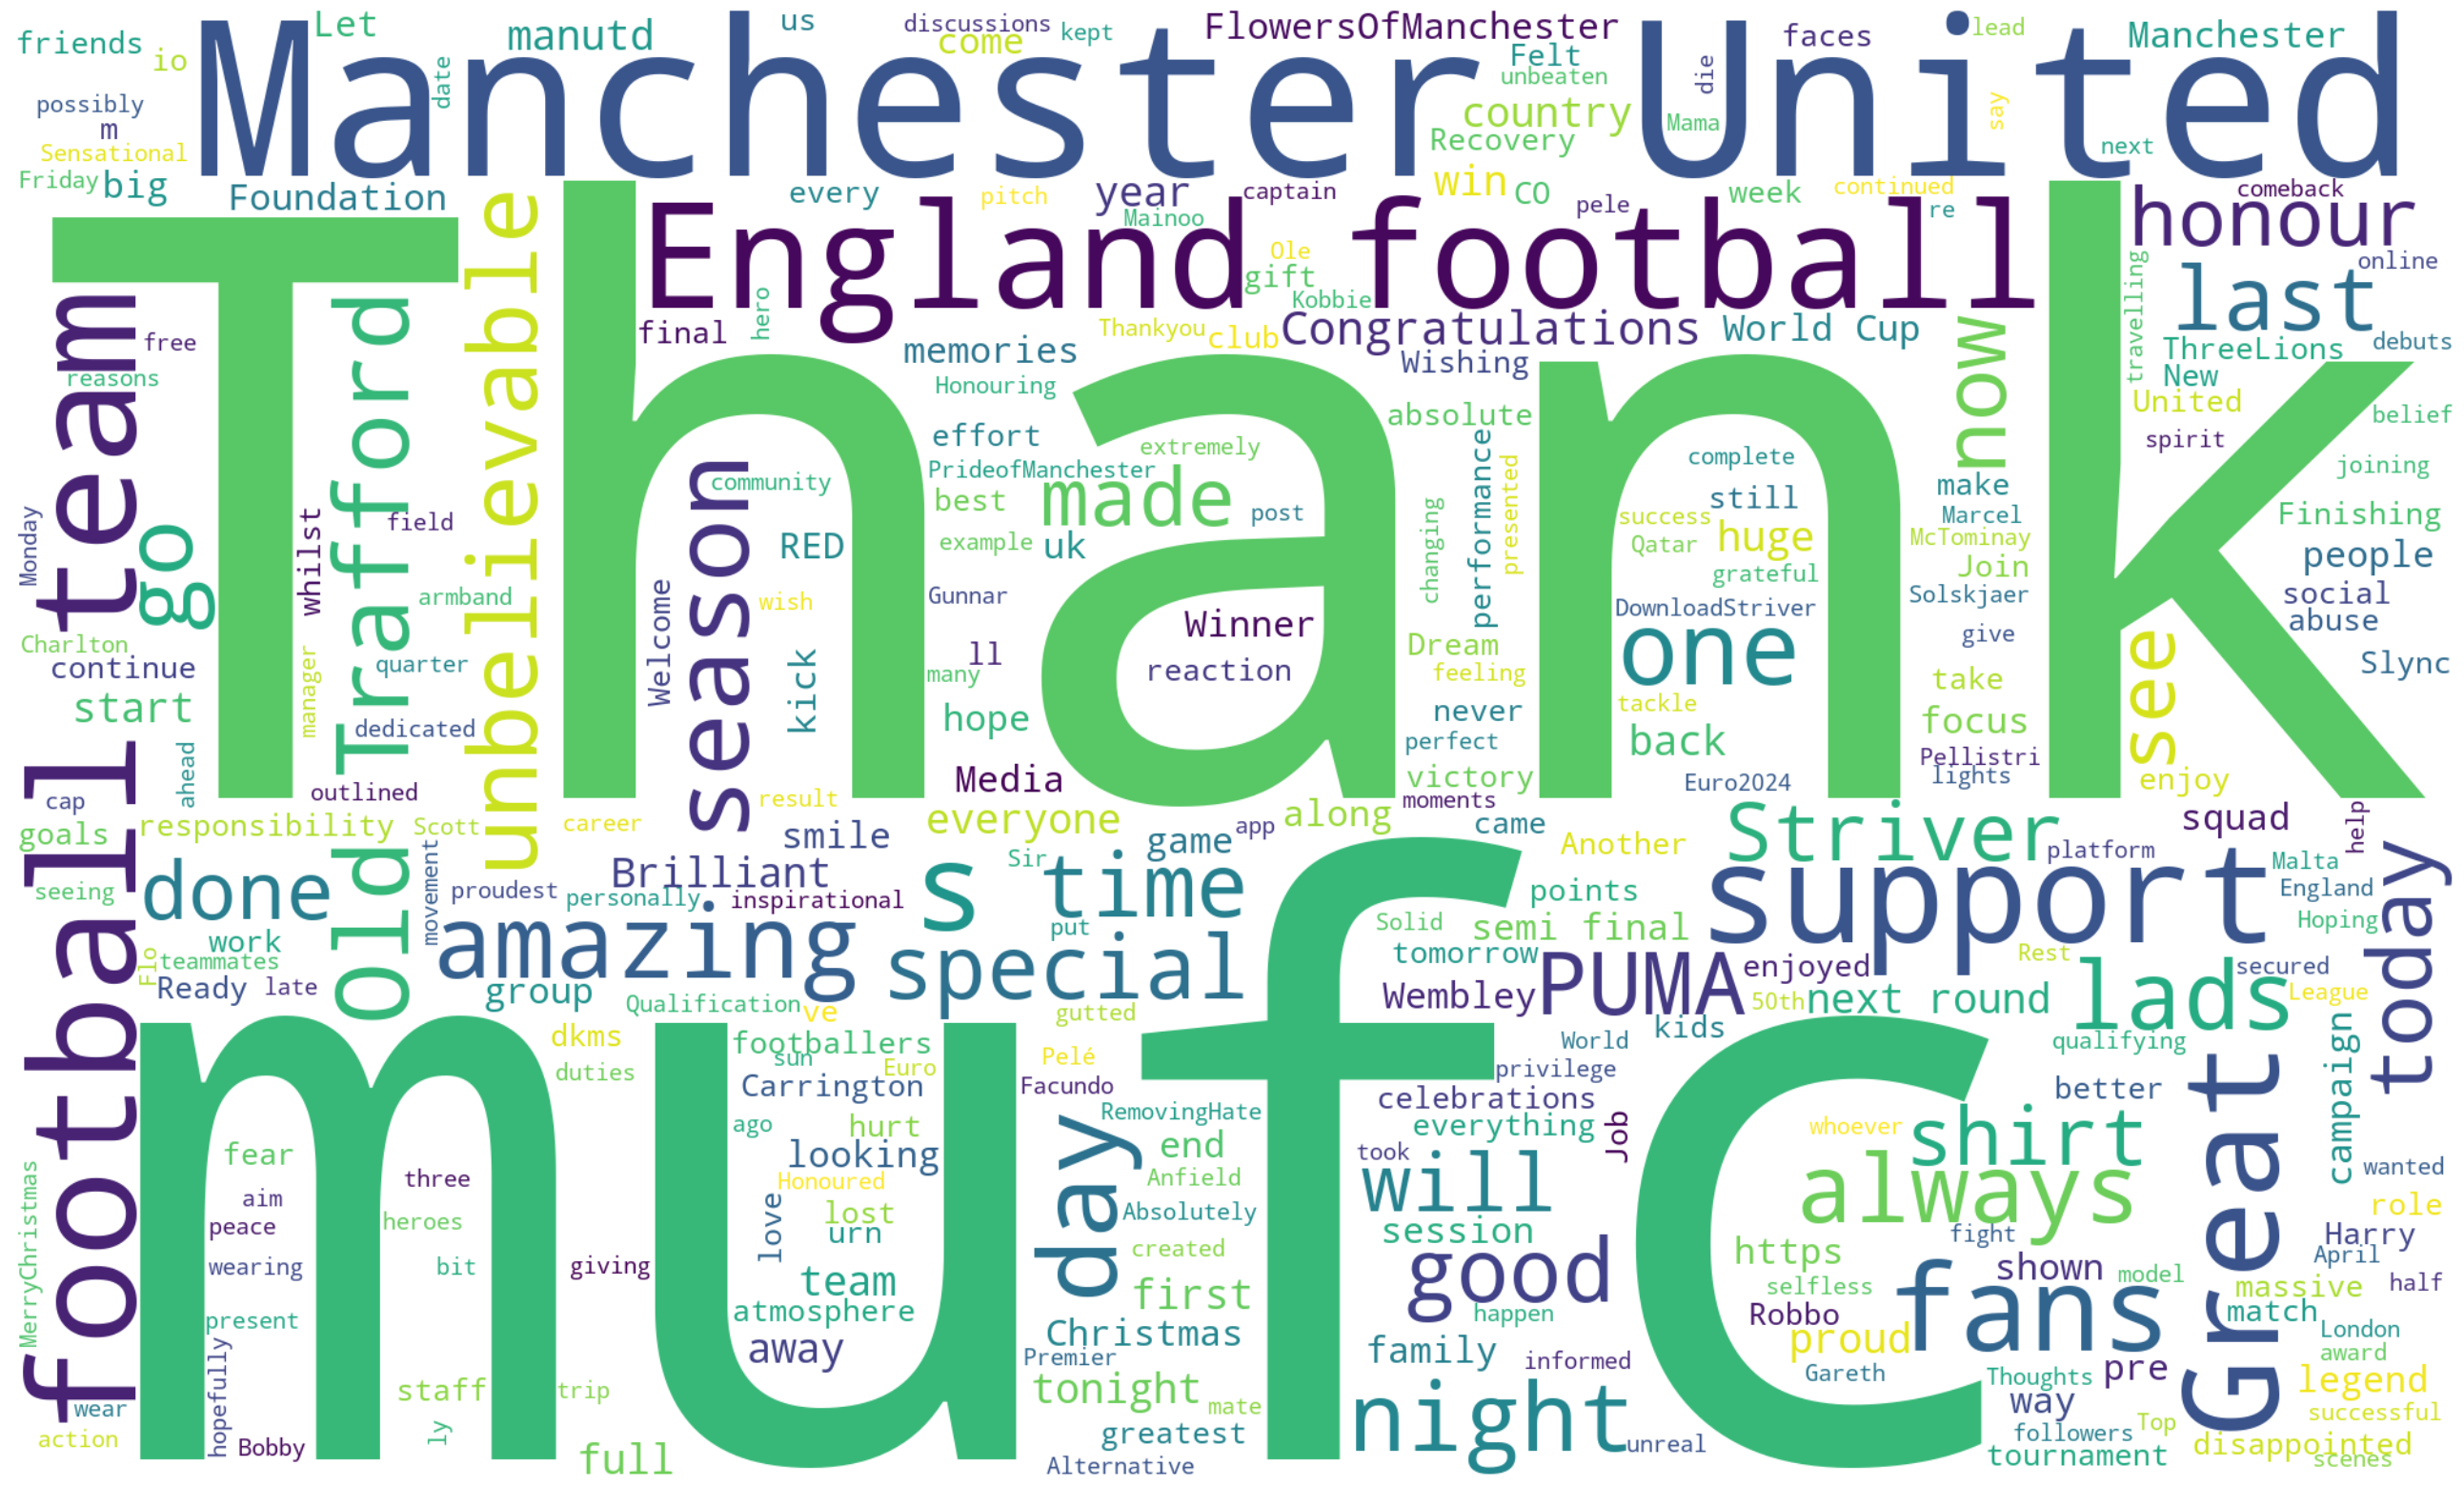

In [18]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['text'].tolist())

# Khởi tạo wordcloud và thiết lập các tham số
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=300,
                      width=2000,
                      height=1200
                     ).generate(text)

# Hiển thị wordcloud
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Tần suất các từ xuất hiện trong comments người dùng

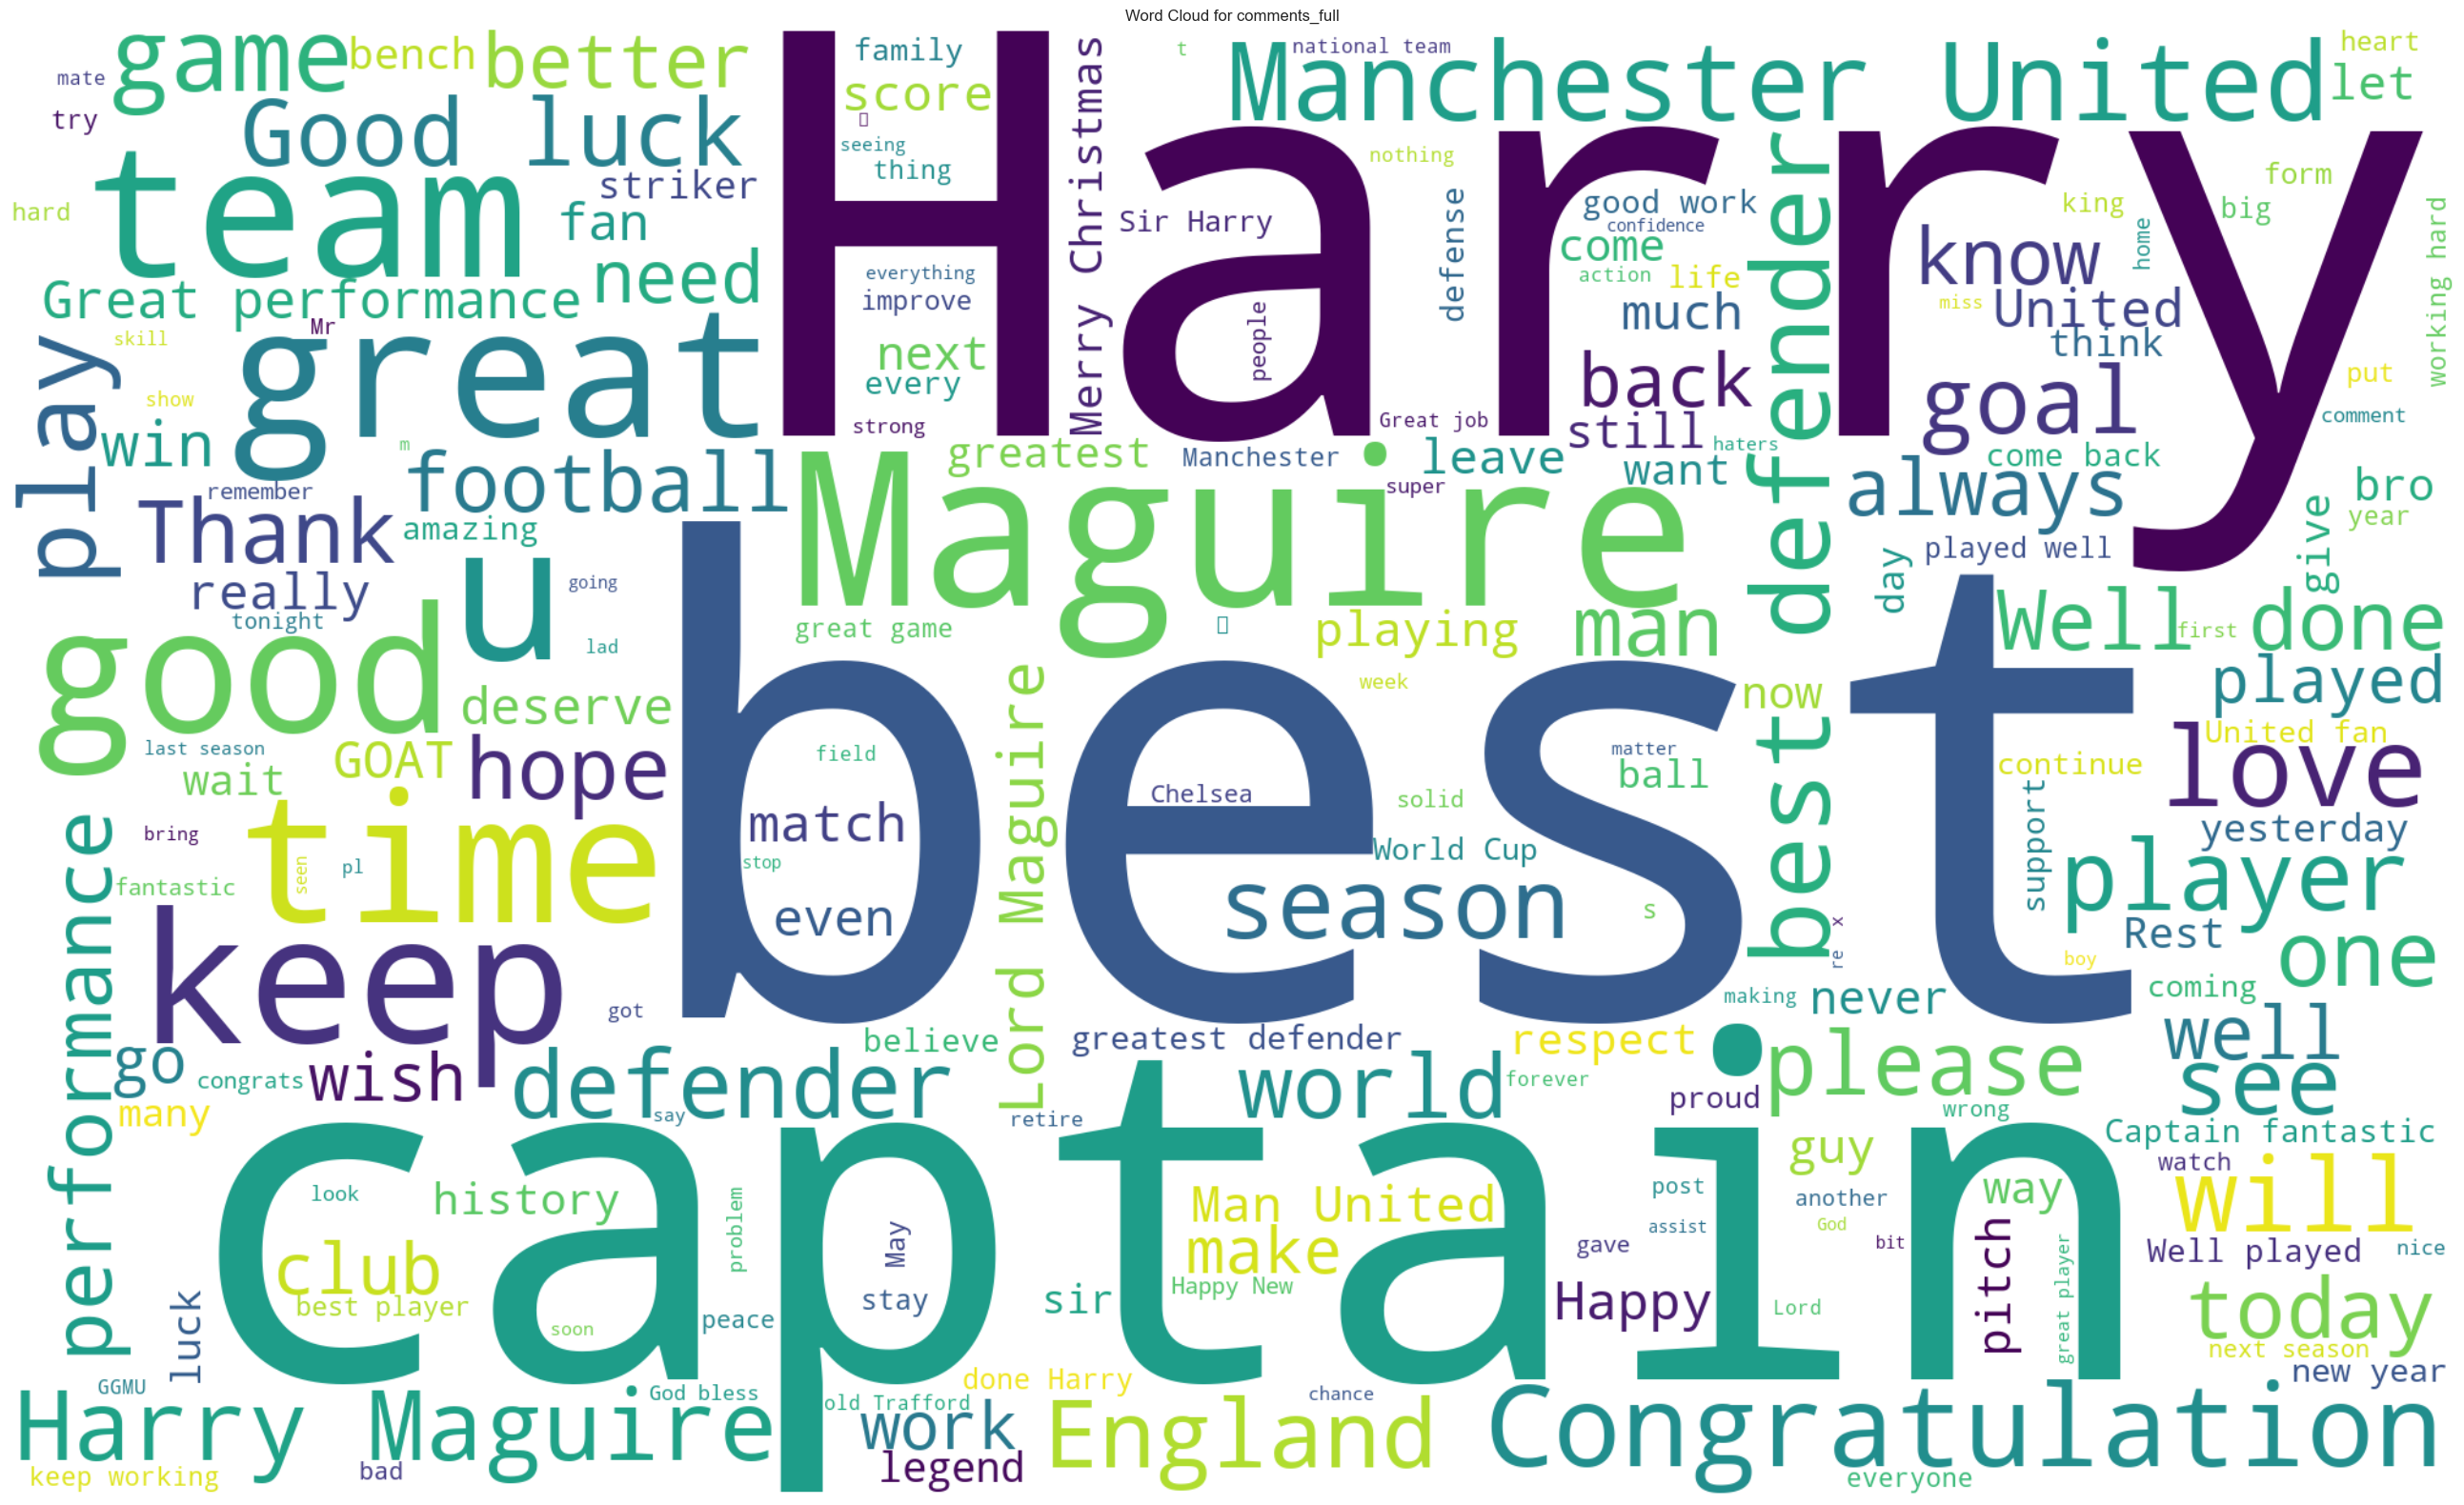

In [19]:
# Lấy nội dung trong trường "comments_full"
comments_full = df["comments_full"].values.tolist()

all_words = ""
for comments in comments_full:
    comments_list = ast.literal_eval(comments)  # Chuyển đổi từ chuỗi thành danh sách
    for comment in comments_list:
        comment_text = comment["text"]
        all_words += comment_text + " "

# Tạo Word Cloud
wordcloud = WordCloud(width=2000, height=1200, background_color="white").generate(all_words)

# Hiển thị Word Cloud
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for comments_full")
plt.show()